<H1 style="text-align:center;">
Predictors
</H1>
<hr style="height:5px;">

## Nearest Neighbor Classifiers
<hr style="height:2px;">

In this example, we will construct a nearest neighbor classifier for the Iris data. First, we load the data set as before, and split it into the training (N=100) and testing (N=50) data sets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Loading data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# spliting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50,
                                                    random_state=2020)

Next, we define a nearest neighbor classification object `KNeighborsClassifier` available under the `sklearn.neighbors` library. As we define the classifier object `kNN`, we use the number of neighbors `k=5`. We use `uniform` weighting for the parameter `weights`.

In [2]:
kNN = KNeighborsClassifier(5, weights='uniform')

Then we train he classifier with the `fit` method.

In [3]:
kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The trained classifier is then used to generate prediction on the testing data.

In [4]:
y_pred = kNN.predict(X_test)

The confusion matrix and the classification report are generated.

In [5]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 14  2]
 [ 0  2 14]]


In [6]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.88      0.88      0.88        16
   virginica       0.88      0.88      0.88        16

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



## Neural Networks
<hr style="height:2px;">

We use a multilayer perceptron (MLP) to classify species in the Iris data set. We define an MLP classifier object `MLPClassifier` available under the `sklearn.neural_network` library. As we define the classifier object `mlp`, we use the stochastic gradient descent solver (`solver=sgd`). We use 2 hidden layers 4 and 2 neurons, as defined by the parameter
`hidden_layer_sizes=(4, 2)`. 

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd',
                    hidden_layer_sizes=(4, 2), random_state=2020)

Then we train he network with the `fit` method.

In [8]:
mlp.fit(X_train,y_train)

/home/satoru/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2020, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

The trained network is then used to generate prediction on the testing data.

In [9]:
y_pred = mlp.predict(X_test)

The confusion matrix and the classification report are generated.

In [10]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 14  2]
 [ 0  2 14]]


In [11]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.88      0.88      0.88        16
   virginica       0.88      0.88      0.88        16

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



## Support Vector Machines
<hr style="height:2px;">

Support vector machine (SVM) classifier and regression models are available under the `sklearn.svm` library as `SVC` and `SVR`, respectively. For the SVM classifier, we define a classifier object `svc` with the linear kernel (`kernel='linear'`) and a somewhat soft margin (`C=1.0`).

In [12]:
from sklearn.svm import SVC, SVR

svc = SVC(kernel='linear', C=0.1)

Then we train the classifier on the training data from the Iris data set. 

In [13]:
svc.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

And we use the trained model for prediction.

In [14]:
y_pred = svc.predict(X_test)   # predicted class

The confusion matrix and the classification report are generated.

In [15]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 15  1]
 [ 0  3 13]]


In [16]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      0.94      0.88        16
   virginica       0.93      0.81      0.87        16

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



For support vector regression, we try to model the petal width with all the other features. First, we define a regression model object `svr` with the linear kernel and a soft margin (`kernel='linear'` and `C=0.1`, respectively). 

In [18]:
svr = SVR(kernel='linear', C=0.1)

Then we train the regression model with the features and the target variable from the training data.

In [19]:
svr.fit(X_train[:,:3],X_train[:,3])

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Then we calculate predicted values of the petal width based on the available features in the testing data. 

In [20]:
y_pred = svr.predict(X_test[:,:3])

We assess the performance of the model by calculating $R^2$ statistic with the `r2_score` function in the `sklearn.metrics` library. 

In [23]:
from sklearn.metrics import r2_score

print(r2_score(X_test[:,3], y_pred))

0.9427223321100942


We now visualize the observed and predicted target variables by a scatter plot of the sepal length against the petal width.

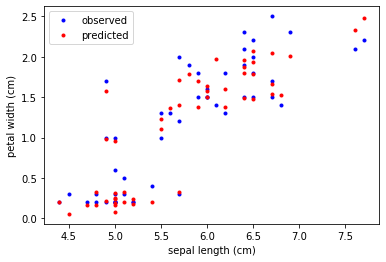

In [24]:
# plotting observed vs predicted (sepal length on x-axis)
plt.plot(X_test[:,0], X_test[:,3],'b.', label='observed')
plt.plot(X_test[:,0], y_pred, 'r.', label='predicted')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[3])
plt.legend()
plt.show()

## Ensemble Methods
<hr style="height:2px;">

As an example of ensemble methods, we train a random forest classifier and use it to predict the Iris species. A random forest classifier is available as `RandomForestClassifier` in the `sklearn.ensemble` library. We define a random forest classifier object `rf`, with the following parameters:
  * Criterion: `criterion = 'entropy'`
  * Number of trees: `n_estimators = 100`
  * Minimum leaf size: `min_samples_leaf = 3`
  * Maximum tree depth: `max_depth = 4`



In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',
                            n_estimators = 100,
                            min_samples_leaf = 3,
                            max_depth = 4,
                            random_state=2020)

Then the model `rf` is trained with the training data.

In [28]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

Predictions are made on the testing data.

In [29]:
y_pred = rf.predict(X_test)

The confusion matrix and the classification report are generated.

In [30]:
print(confusion_matrix(y_test,y_pred))

[[18  0  0]
 [ 0 14  2]
 [ 0  3 13]]


In [31]:
print(classification_report(y_test, y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.82      0.88      0.85        16
   virginica       0.87      0.81      0.84        16

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

